In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime


## Data Proccesing

In [21]:
df = pd.read_csv("C:\\users\\MagicBook\\Desktop\\Jersey City Solar.csv",encoding='latin1')
df


,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_Day_Ahead
0,2015,1,1,8,30,93,93,0,0.4,66.16,0.0,970,0
1,2015,1,1,9,30,236,236,0,0.3,63.72,2.0,970,89
2,2015,1,1,10,30,351,351,0,0.3,65.71,5.0,970,228
3,2015,1,1,11,30,419,419,0,0.3,70.69,7.0,960,340
4,2015,1,1,12,30,432,432,0,0.2,75.98,8.0,960,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17483,2018,12,30,12,30,255,419,4,0.2,78.45,6.2,969,249
17484,2018,12,30,13,30,304,377,4,0.2,77.18,6.1,969,236
17485,2018,12,30,14,30,200,286,7,0.1,78.29,5.6,969,246
17486,2018,12,30,15,30,88,157,6,0.1,79.94,5.3,969,298


In [22]:
df = df.dropna()
df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_Day_Ahead
0,2015,1,1,8,30,93,93,0,0.4,66.16,0.0,970,0
1,2015,1,1,9,30,236,236,0,0.3,63.72,2.0,970,89
2,2015,1,1,10,30,351,351,0,0.3,65.71,5.0,970,228
3,2015,1,1,11,30,419,419,0,0.3,70.69,7.0,960,340
4,2015,1,1,12,30,432,432,0,0.2,75.98,8.0,960,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17483,2018,12,30,12,30,255,419,4,0.2,78.45,6.2,969,249
17484,2018,12,30,13,30,304,377,4,0.2,77.18,6.1,969,236
17485,2018,12,30,14,30,200,286,7,0.1,78.29,5.6,969,246
17486,2018,12,30,15,30,88,157,6,0.1,79.94,5.3,969,298


In [23]:
JerseyCity_df = pd.read_csv("C:\\users\\MagicBook\\Desktop\\Jersey City Solar1.csv",encoding='latin1')
JerseyCity_df

,Year,Month,Day,Hour,Minute,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_Day_Ahead
0,2015,1,1,0,30,0,0,0,0.4,85.18,-1.0,970,0
1,2015,1,1,1,30,0,0,0,0.4,83.54,-1.0,970,0
2,2015,1,1,2,30,0,0,0,0.4,82.07,-1.0,970,0
3,2015,1,1,3,30,0,0,0,0.4,80.75,-1.0,970,0
4,2015,1,1,4,30,0,0,0,0.4,79.63,-2.0,970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35012,2018,12,30,20,30,0,0,0,0.1,83.23,2.9,969,0
35013,2018,12,30,21,30,0,0,0,0.1,83.75,2.7,969,0
35014,2018,12,30,22,30,0,0,0,0.1,83.67,2.4,969,0
35015,2018,12,30,23,30,0,0,0,0.1,83.41,2.1,970,0


In [25]:
Corr = JerseyCity_df.corr()
Corr['GHI_Day_Ahead']

Year                 0.001864
Month               -0.028440
Day                  0.006583
Hour                 0.118228
Minute                    NaN
GHI                  0.887160
Clearsky GHI         0.894439
Cloud Type          -0.177922
Wind Speed          -0.064608
Relative Humidity   -0.643953
Temperature          0.651780
Pressure            -0.025800
GHI_Day_Ahead        1.000000
Name: GHI_Day_Ahead, dtype: float64

In [26]:
JerseyCity_df_new = JerseyCity_df.copy()

JerseyCity_df_new['DateTime'] = JerseyCity_df[['Year', 'Month', 'Day', 'Hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
JerseyCity_df_new = JerseyCity_df_new.drop(columns = ['Year','Minute'])
JerseyCity_df_new['DateTime'] = pd.to_datetime(JerseyCity_df_new['DateTime']) 
JerseyCity_df_new.set_index(['DateTime'], drop=True, inplace=True)
JerseyCity_df_new.head(15)

,Month,Day,Hour,GHI,Clearsky GHI,Cloud Type,Wind Speed,Relative Humidity,Temperature,Pressure,GHI_Day_Ahead
DateTime,,,,,,,,,,,
2015-01-01 00:00:00,1,1,0,0,0,0,0.4,85.18,-1.0,970,0
2015-01-01 01:00:00,1,1,1,0,0,0,0.4,83.54,-1.0,970,0
2015-01-01 02:00:00,1,1,2,0,0,0,0.4,82.07,-1.0,970,0
2015-01-01 03:00:00,1,1,3,0,0,0,0.4,80.75,-1.0,970,0
2015-01-01 04:00:00,1,1,4,0,0,0,0.4,79.63,-2.0,970,0
2015-01-01 05:00:00,1,1,5,0,0,0,0.4,78.93,-2.0,970,0
2015-01-01 06:00:00,1,1,6,0,0,0,0.4,78.75,-2.0,970,0
2015-01-01 07:00:00,1,1,7,0,0,0,0.4,72.82,-1.0,970,0
2015-01-01 08:00:00,1,1,8,93,93,0,0.4,66.16,0.0,970,0


### Time Series

Text(0, 0.5, 'GHI ($w/m^2$)')

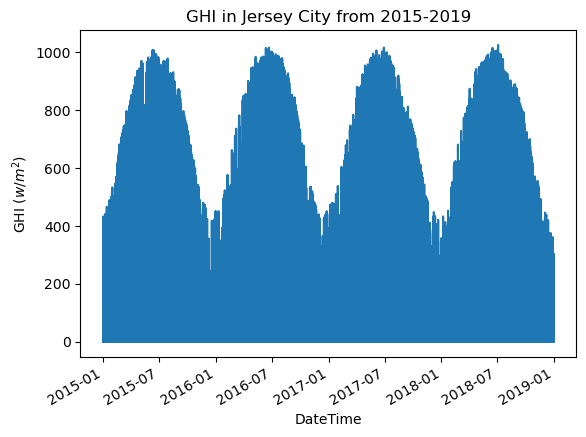

In [28]:
GHI =JerseyCity_df_new['GHI']
GHI.plot()
plt.title('GHI in Jersey City from 2015-2019')
plt.ylabel('GHI ($w/m^2$)')

## LTSM 24 hour ahead

In [29]:
def df_to_X_y_24(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(0, df.shape[0]-window_size-24):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size+24,3]
        y.append(label)
    return np.array(X), np.array(y)

In [30]:
window_size = 24
X,y = df_to_X_y_24(JerseyCity_df_new, 24)
X.shape, y.shape


((34969, 24, 1, 11), (34969,))

In [31]:
m,n = X.shape[::3]
X = np.rollaxis(X,3,1).reshape(m,-1,n)
X.shape


(34969, 24, 11)

In [32]:
X_train, X_test, Y_train, Y_test = X[:26244],X[26244:], y[:26244], y[26244:] # Testing: from 30/12/2017 - 31/ 12/ 2018
print('Shape of X_train set:',X_train.shape) 
print('Shape of Y_train set:',Y_train.shape)
print('Shape of X_test set:',X_test.shape)
print('Shape of Y_test set:',Y_test.shape)
y

Shape of X_train set: (26244, 24, 11)
Shape of Y_train set: (26244,)
Shape of X_test set: (8725, 24, 11)
Shape of Y_test set: (8725,)


array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import *
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((24,10)))
model2.add(LSTM(50))
model2.add(Dense(50,'relu'))
model2.add(Dense(10,'relu'))
model2.add(Dense(1,'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50)                12200     
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 15,271
Trainable params: 15,271
Non-trainable params: 0
_________________________________________________________________


In [34]:
cp = ModelCheckpoint('model2/',save_best_only =True)
model2.compile(loss = MeanSquaredError() , optimizer = Adam(learning_rate = 0.0001), metrics = RootMeanSquaredError()) 

#### Comparision between Actual and Train predictions - LSTM

In [15]:
train_predictions = model2.predict(X_train).flatten()
train_results = pd.DataFrame(data = {'Train prediction':train_predictions,'Actual':Y_train }, index = MEDford_df_new.index[:26244])
train_results


821/821 [==============================] - 4s 4ms/step


,Train prediction,Actual
DateTime,,
2015-01-01 00:00:00,-0.686812,0.0
2015-01-01 01:00:00,1.314318,0.0
2015-01-01 02:00:00,1.489142,0.0
2015-01-01 03:00:00,3.558114,0.0
2015-01-01 04:00:00,0.964278,0.0
...,...,...
2017-12-30 07:00:00,4.362226,0.0
2017-12-30 08:00:00,48.857727,55.0
2017-12-30 09:00:00,76.194153,110.0


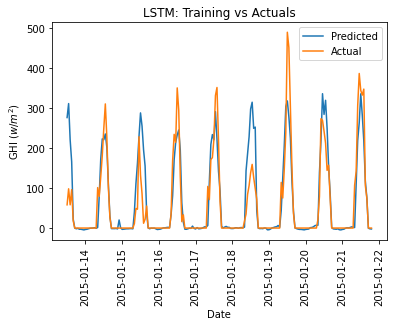

In [16]:
plt.plot(train_results['Train prediction'][300:500], label = 'Predicted')
plt.plot(train_results['Actual'][300:500], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM: Training vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

#### Comparision between Actual and Test predictions - LSTM

In [17]:
test_predictions = model2.predict(X_test).flatten()
test_results = pd.DataFrame(data = {'Test prediction':test_predictions,'Actual':Y_test },index = MEDford_df_new.index[26292:])
test_results

274/274 [==============================] - 1s 4ms/step


,Test prediction,Actual
DateTime,,
2018-01-01 12:00:00,228.350311,167.0
2018-01-01 13:00:00,200.591125,175.0
2018-01-01 14:00:00,193.784927,151.0
2018-01-01 15:00:00,93.688957,73.0
2018-01-01 16:00:00,2.088435,13.0
...,...,...
2018-12-31 19:00:00,2.849514,0.0
2018-12-31 20:00:00,1.508250,0.0
2018-12-31 21:00:00,-0.205493,0.0


#### Testing Prediction vs Actuals - LSTM

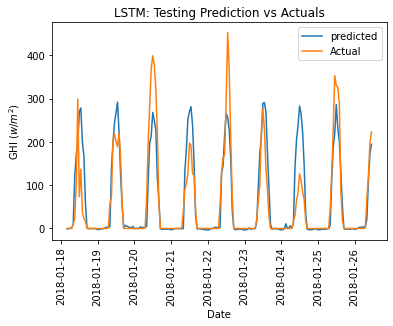

In [18]:
plt.plot(test_results['Test prediction'][400:600],label = 'predicted')
plt.plot(test_results['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM: Testing Prediction vs Actuals')
_=plt.xticks(rotation = 90)
plt.legend()

#### Training and Testing scores of LSTM 

In [19]:
from sklearn.metrics import r2_score
print('Training score:', r2_score(Y_train, train_results['Train prediction'] ))
print('Testing score:', r2_score(test_results['Actual'], test_results['Test prediction']))
test_results.corr()['Test prediction']

Training score: 0.904896971945314
Testing score: 0.9005283482496975


Test prediction    1.000000
Actual             0.949021
Name: Test prediction, dtype: float64

## Scenario 2

##### Winter: 12 ,1 ,2 
##### Spring: 3,4,5
##### Summer: 6,7,8
##### Fall : 9,10,11

In [20]:
Fall_LSTM = test_results['2018-9-1 01:00:00': '2018-11-30 23:00:00']
Spring_LSTM =test_results['2018-3-1 01:00:00': '2018-5-31 23:00:00']
Summer_LSTM = test_results['2018-6-1 01:00:00': '2018-8-31 23:00:00']
W = test_results['2018-1-1 01:00:00': '2018-2-28 23:00:00']
W.values.tolist()
Winter_LSTM = W.append(test_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])
Winter_LSTM

C:\Users\Hamza\AppData\Local\Temp\ipykernel_22580\3938544548.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Winter_LSTM = W.append(test_results['2018-12-1 01:00:00': '2018-12-31 23:00:00'])


,Test prediction,Actual
DateTime,,
2018-01-01 12:00:00,228.350311,167.0
2018-01-01 13:00:00,200.591125,175.0
2018-01-01 14:00:00,193.784927,151.0
2018-01-01 15:00:00,93.688957,73.0
2018-01-01 16:00:00,2.088435,13.0
...,...,...
2018-12-31 19:00:00,2.849514,0.0
2018-12-31 20:00:00,1.508250,0.0
2018-12-31 21:00:00,-0.205493,0.0


In [21]:
%store Fall_LSTM
%store Spring_LSTM
%store Summer_LSTM
%store Winter_LSTM

Stored 'Fall_LSTM' (DataFrame)
Stored 'Spring_LSTM' (DataFrame)
Stored 'Summer_LSTM' (DataFrame)
Stored 'Winter_LSTM' (DataFrame)


#### Winter

LSTM Winter Testing score: 0.7629203479855237


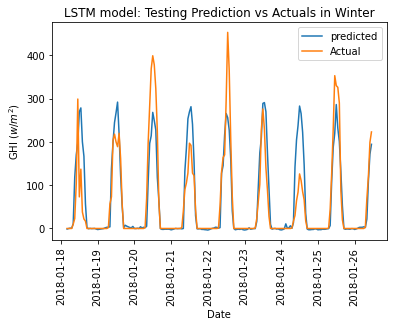

In [22]:
plt.plot(Winter_LSTM['Test prediction'][400:600],label = 'predicted')
plt.plot(Winter_LSTM['Actual'][400:600], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Winter')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Winter Testing score:', r2_score(Winter_LSTM['Actual'], Winter_LSTM['Test prediction']))

#### Summer

LSTM Summer Testing score: 0.9621588827804449


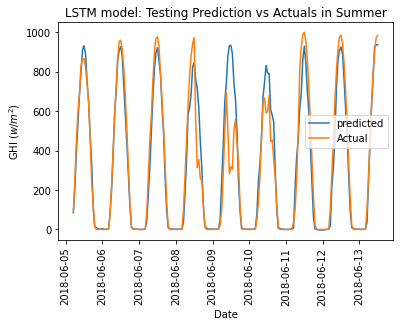

In [23]:
plt.plot(Summer_LSTM['Test prediction'][100:300],label = 'predicted')
plt.plot(Summer_LSTM['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Summer')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Summer Testing score:', r2_score(Summer_LSTM['Actual'], Summer_LSTM['Test prediction']))

#### Spring

LSTM Spring Testing score: 0.8010061664102307


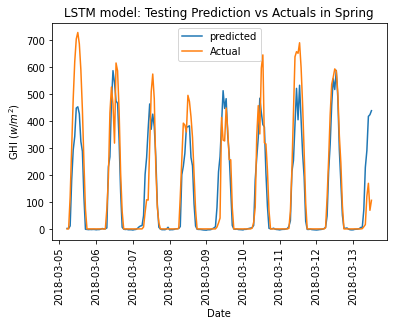

In [24]:
plt.plot(Spring_LSTM['Test prediction'][100:300],label = 'predicted')
plt.plot(Spring_LSTM['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Spring')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Spring Testing score:', r2_score(Spring_LSTM['Actual'], Spring_LSTM['Test prediction']))

#### Fall

LSTM Fall Testing score: 0.9020727156505178


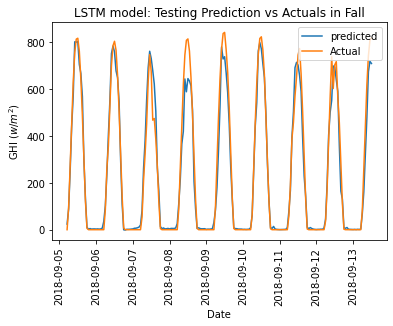

In [25]:
plt.plot(Fall_LSTM['Test prediction'][100:300],label = 'predicted')
plt.plot(Fall_LSTM['Actual'][100:300], label = 'Actual')
plt.xlabel('Date')
plt.ylabel('GHI ($w/m^2$)')
plt.title('LSTM model: Testing Prediction vs Actuals in Fall')
_=plt.xticks(rotation = 90)
plt.legend()
print('LSTM Fall Testing score:', r2_score(Fall_LSTM['Actual'], Fall_LSTM['Test prediction']))